# Libraries and versions

In [1]:
#Basic libraries
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3

#for analyse multiple features
from sklearn import __version__ as skn #version 0.24.1
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

#for model classifier
from catboost import __version__ as ct #0.25.1
from catboost import CatBoostClassifier, Pool

import plotly.express as px

In [2]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')
print(f'CatBoost version - {ct}')

Python version - 3.7.9
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.0
Matplotlib version - 3.3.3
CatBoost version - 0.25.1


# Configurations

## Seaborn

In [3]:
sns.set_palette('Set1')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors='black'):
    graphic_object.figure.set_size_inches(15,8)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warning

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Dataset

In [5]:
dataset = pd.read_csv('18_feature_selected.csv')
dataset.head()

,Net Income to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥),Working Capital to Total Assets,Net Income to Stockholder's Equity,Net Value Per Share (A),CFO to Assets,Cash/Total Assets,Gross Profit to Sales,Equity to Long-term Liability,Current Liability to Equity,Current Liability to Current Assets,Borrowing dependency,Current Liability to Assets,Debt ratio %,Bankrupt
0,0.716845,0.792424,0.169141,0.903225,0.137757,0.138736,0.672775,0.827890,0.147950,0.520382,0.004094,0.601453,0.126549,0.339077,0.118250,0.390284,0.147308,0.207576,1
1,0.795297,0.828824,0.208944,0.931065,0.168962,0.169918,0.751111,0.839969,0.182251,0.567101,0.014948,0.610237,0.120916,0.329740,0.047775,0.376760,0.056963,0.171176,1
2,0.774670,0.792484,0.180581,0.909903,0.148036,0.142803,0.829502,0.836774,0.177911,0.538491,0.000991,0.601449,0.117922,0.334777,0.025346,0.379093,0.098162,0.207516,1
3,0.739555,0.848535,0.193722,0.906902,0.147561,0.148603,0.725754,0.834697,0.154187,0.604105,0.018851,0.583538,0.120760,0.331509,0.067250,0.379743,0.098715,0.151465,1
4,0.795016,0.893491,0.212537,0.913850,0.167461,0.168412,0.751822,0.839973,0.167502,0.578469,0.014161,0.598782,0.110933,0.330726,0.047725,0.375025,0.110195,0.106509,1


## Select features

In [6]:
# total len of dataset
dataset.shape

(6819, 19)

### X and y

In [7]:
X = dataset.drop(columns=['Bankrupt'])
y = dataset['Bankrupt']

print(f'Number of features for X = {X.shape[1]}')

Number of features for X = 18


## CatBoostClassifier

In [8]:
#split data in train and test with different X
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=666)

#intance model
cbc = CatBoostClassifier()

#train model
cbc.fit(X_train, y_train, silent=True)
y_predict = cbc.predict(X_test)

#check accuracy
total_accuracy = accuracy_score(y_test, y_predict) * 100

#create a DataFrame to count correct value predict for 1 in y_predict
results = {'Test':y_test, 'Predict':y_predict}
results = pd.DataFrame(results)
results['OK'] = results['Test'] == results['Predict']
bankrupt_accuracy = results.query('Predict==1 & OK==True').shape[0]
bankrupt_total = results['Test'].sum()
bankrupt_score = bankrupt_accuracy / bankrupt_total * 100

#see results
print(f'Total Accuracy - {total_accuracy:.2f}\nBanrupt correct predicted - {bankrupt_accuracy}')
print(f'Bankrupt Score - {bankrupt_score:.2f}')

Total Accuracy - 97.07
Banrupt correct predicted - 10
Bankrupt Score - 22.73


## Analyse error

#### Create a new dataframe with test, predicted and check columns

In [9]:
X_test['y_test'] = y_test
X_test['y_predict'] = y_predict
X_test['check'] = y_test == y_predict
df_analysis = X_test.copy()

df_analysis.shape

(1364, 21)

#### Create an TSNE object for 18 variables

In [10]:
tsne = TSNE(n_components=2)
X_tsne = df_analysis.drop(columns=['y_test', 'y_predict', 'check'])#exclude target variables
X_tsne = tsne.fit_transform(X_tsne)

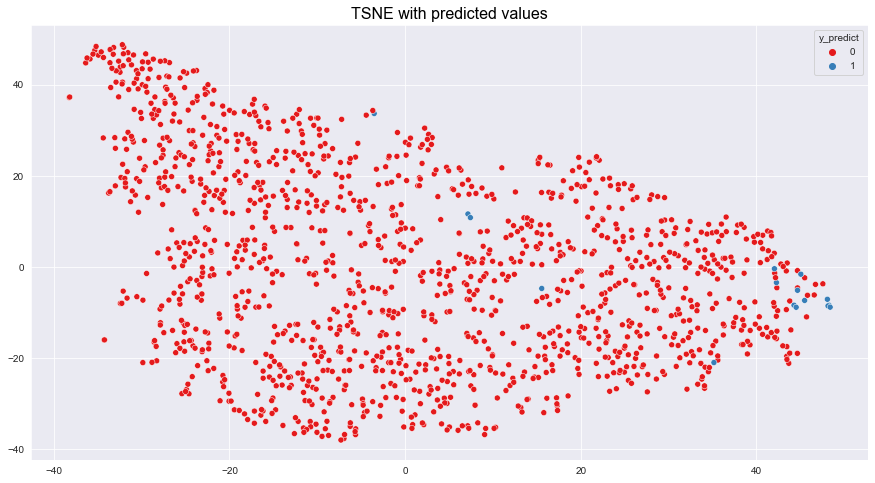

In [11]:
graphic1 = sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_analysis['y_predict'])
configuration(graphic1, title='TSNE with predicted values')

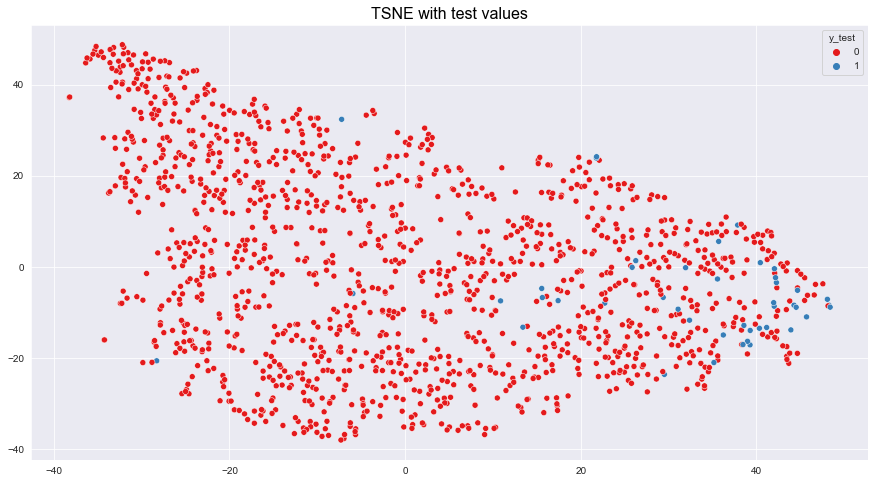

In [12]:
graphic2 = sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_analysis['y_test'])
configuration(graphic2, title='TSNE with test values')

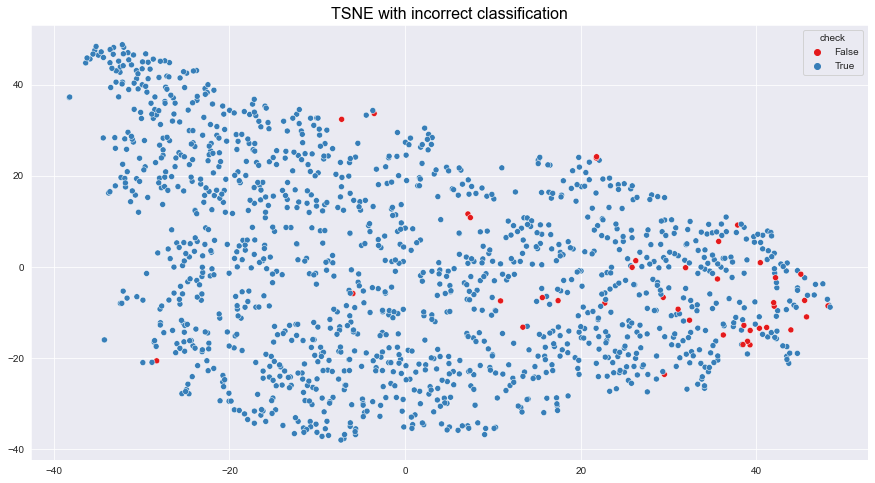

In [13]:
graphic3 = sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df_analysis['check'])
configuration(graphic3, title='TSNE with incorrect classification')

### 3D visualization

In [18]:
fig = px.scatter_3d(x=X_tsne[:,0], y=X_tsne[:,1], z=df_analysis['y_test'], color=df_analysis['y_predict'])
fig.show()

## Maximize differences between 1 and 0

#### Fist attempt

- I will create a new variable with quantile positions (0.25, 0.50, 0.75) using the best variable choosen by CatBoost

In [47]:
quantile_list = []
for value in dataset['Persistent EPS in the Last Four Seasons']:
    if value >= dataset['Persistent EPS in the Last Four Seasons'].quantile(0.75):
        quantile_list.append(4)
    elif value >= dataset['Persistent EPS in the Last Four Seasons'].quantile(0.5):
        quantile_list.append(3)
    elif value >= dataset['Persistent EPS in the Last Four Seasons'].quantile(0.25):
        quantile_list.append(2)
    else:
        quantile_list.append(1)
dataset['quantile'] = quantile_list

In [50]:
dataset.query('Bankrupt==0')['quantile'].value_counts(normalize=True)

4    0.258979
3    0.256554
2    0.254736
1    0.229732
Name: quantile, dtype: float64

In [51]:
dataset.query('Bankrupt==1')['quantile'].value_counts(normalize=True)

1    0.850000
2    0.100000
3    0.045455
4    0.004545
Name: quantile, dtype: float64

- 85 percent of bankrupted companies has this variable in first quantile
- the quantile for "good" companies had a very distribution for each

### Test model with this new variable

#### X and y

In [54]:
X = dataset.drop(columns=['Bankrupt'])
y = dataset['Bankrupt']

#### Test one

In [55]:
#split data in train and test with different X
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=666)

#intance model
cbc1 = CatBoostClassifier()

#train model
cbc1.fit(X_train, y_train, silent=True)
y_predict = cbc1.predict(X_test)

#check accuracy
total_accuracy = accuracy_score(y_test, y_predict) * 100

#create a DataFrame to count correct value predict for 1 in y_predict
results = {'Test':y_test, 'Predict':y_predict}
results = pd.DataFrame(results)
results['OK'] = results['Test'] == results['Predict']
bankrupt_accuracy = results.query('Predict==1 & OK==True').shape[0]
bankrupt_total = results['Test'].sum()
bankrupt_score = bankrupt_accuracy / bankrupt_total * 100

#see results
print(f'Total Accuracy - {total_accuracy:.2f}\nBanrupt correct predicted - {bankrupt_accuracy}')
print(f'Bankrupt Score - {bankrupt_score:.2f}')

Total Accuracy - 97.14
Banrupt correct predicted - 9
Bankrupt Score - 20.45
